# Vertical mixing under a constant background diffusivity

This notebook validades the MOM6 solution of a 1D temperature profile under a constant background vertical diffusion. Numerical results are compared against an analutical solution.

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from scipy import special
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 4.0)

Populating the interactive namespace from numpy and matplotlib


## Initial Conditions 

$\theta(z)$ = 1 for z $>$ -200 m

$\theta(z)$ = 0 for z $<=$ -200 m

## Boundary contidions

$\frac{\partial \theta}{\partial z} = 0$ at surface and bottom

## Vertical diffusion

$KD$ = 1.0E-4 m$^2$ s$^{-1}$

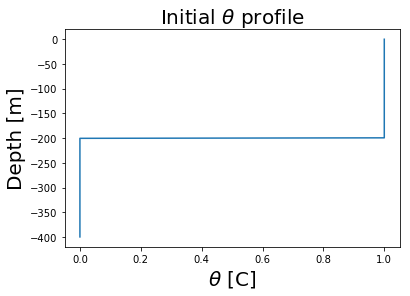

In [2]:
temp_ic = Dataset('MOM_IC.nc').variables['Temp'][0,:,1,1]
z = Dataset('MOM_IC.nc').variables['Layer'][:]
plt.figure(figsize(6,4))
plt.plot(temp_ic,-z); plt.title(r'Initial $\theta$ profile', fontsize=20)
plt.xlabel(r'$\theta$ [C]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20)

## Numerical vs. Analytical solution
Steps on how to derive an analytical solition can be found in the following PDF: http://web.math.ucsb.edu/~grigoryan/124A/lecs/lec10.pdf 

In [9]:
# analytical solution
nz=400
z1 = -np.linspace(-200,200,nz)
tr = np.ones(nz)*0.
tr[nz/2:]=1
kd = 1.0e-4
# analytical solution
time = 3600*24*50 # 50 days
tr_ana = 0.5 + 0.5 * special.erf(z1/np.sqrt(4*time*kd))

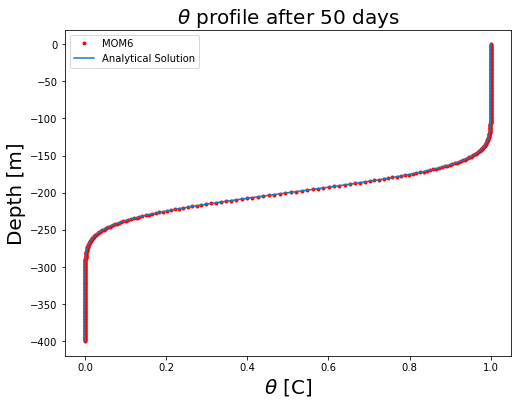

In [10]:
time = Dataset('prog_z.nc').variables['Time'][:]
temp =  Dataset('prog_z.nc').variables['temp'][:,:,1,1]

plt.figure(figsize(8,6))
plt.plot(temp[-1,:],-z,'r.',label='MOM6');plt.plot(tr_ana,-z, label='Analytical Solution');
plt.legend()
plt.title(r'$\theta$ profile after 50 days', fontsize=20)
plt.xlabel(r'$\theta$ [C]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20)

In [13]:
def rmse(model, analytical):
    return np.sqrt(((model - analytical) ** 2).mean())

rmse = format(rmse(temp[-1,:], tr_ana), '.6f')
print 'RMSE ',rmse

RMSE  0.000138


## Potential temperature ($\theta$) drift

(-250, -150)

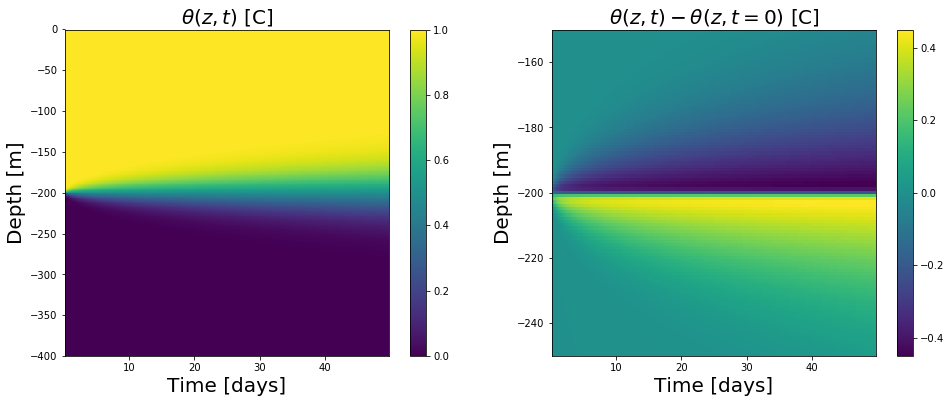

In [14]:
temp_drift  = temp-temp[0,:]
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.pcolormesh(time, -z, temp.T)
plt.colorbar(); plt.title(r'$\theta(z,t)$ [C]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20)
plt.subplot(122)
plt.pcolormesh(time, -z, temp_drift.T)
plt.colorbar(); plt.title(r'$\theta(z,t) - \theta(z,t=0)$ [C]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-250,-150])
